In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mutual_info_score

from tqdm.notebook import tqdm

%matplotlib inline

In [2]:
np.random.seed(123)

In [3]:
df = pd.read_csv('weatherAUS.csv')

In [4]:
df.columns = df.columns.str.lower()

In [5]:
df.head(10)

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,...,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   date           145460 non-null  object 
 1   location       145460 non-null  object 
 2   mintemp        143975 non-null  float64
 3   maxtemp        144199 non-null  float64
 4   rainfall       142199 non-null  float64
 5   evaporation    82670 non-null   float64
 6   sunshine       75625 non-null   float64
 7   windgustdir    135134 non-null  object 
 8   windgustspeed  135197 non-null  float64
 9   winddir9am     134894 non-null  object 
 10  winddir3pm     141232 non-null  object 
 11  windspeed9am   143693 non-null  float64
 12  windspeed3pm   142398 non-null  float64
 13  humidity9am    142806 non-null  float64
 14  humidity3pm    140953 non-null  float64
 15  pressure9am    130395 non-null  float64
 16  pressure3pm    130432 non-null  float64
 17  cloud9am       89572 non-null

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mintemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
maxtemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
windgustspeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
windspeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
windspeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [8]:
for column in df.columns:
    print('column', column, 'contains', df[column].nunique(), 'unique values')

column date contains 3436 unique values
column location contains 49 unique values
column mintemp contains 389 unique values
column maxtemp contains 505 unique values
column rainfall contains 681 unique values
column evaporation contains 358 unique values
column sunshine contains 145 unique values
column windgustdir contains 16 unique values
column windgustspeed contains 67 unique values
column winddir9am contains 16 unique values
column winddir3pm contains 16 unique values
column windspeed9am contains 43 unique values
column windspeed3pm contains 44 unique values
column humidity9am contains 101 unique values
column humidity3pm contains 101 unique values
column pressure9am contains 546 unique values
column pressure3pm contains 549 unique values
column cloud9am contains 10 unique values
column cloud3pm contains 10 unique values
column temp9am contains 441 unique values
column temp3pm contains 502 unique values
column raintoday contains 2 unique values
column raintomorrow contains 2 uniqu

In [9]:
for column in df.columns:
    print('column', column, 'contains', df[column].isnull().sum(), 'null values')

column date contains 0 null values
column location contains 0 null values
column mintemp contains 1485 null values
column maxtemp contains 1261 null values
column rainfall contains 3261 null values
column evaporation contains 62790 null values
column sunshine contains 69835 null values
column windgustdir contains 10326 null values
column windgustspeed contains 10263 null values
column winddir9am contains 10566 null values
column winddir3pm contains 4228 null values
column windspeed9am contains 1767 null values
column windspeed3pm contains 3062 null values
column humidity9am contains 2654 null values
column humidity3pm contains 4507 null values
column pressure9am contains 15065 null values
column pressure3pm contains 15028 null values
column cloud9am contains 55888 null values
column cloud3pm contains 59358 null values
column temp9am contains 1767 null values
column temp3pm contains 3609 null values
column raintoday contains 3261 null values
column raintomorrow contains 3267 null values

In [10]:
#Drop evaporation, sunshine, cloud9am, cloud3pm columns due to big amount of NAs

df.drop(columns=['evaporation', 'sunshine', 'cloud9am', 'cloud3pm'], inplace=True)

In [11]:
#Splitting Date column on year, month, and day

split = df.date.str.split('-', n=-1, expand=True)

df['year'] = split[0]
df['month'] = split[1]
df['day'] = split[2]

df.drop(columns=['date'], inplace=True)

In [12]:
df = df.astype({'year': 'int32', 'month': 'int32', 'day': 'int32'})

In [13]:
#Getting numeric columns

numeric = []
for column in df.columns:
    if df[column].dtype == np.float64:
        numeric.append(column)

In [14]:
#Getting categorical columns

categorical = []
for i in  df.columns:
    if i not in numeric:
        if i != 'raintomorrow':
            categorical.append(i)

In [15]:
df.raintomorrow = (df.raintomorrow == 'Yes').astype(int)

In [16]:
#Drop NA values in target column 

df.dropna(subset=['raintomorrow'], inplace=True)
df.reset_index(inplace=True, drop=True)

In [17]:
#Filling NA with propagating last valid observation forward to next valid

df = df.fillna(method='ffill')

In [18]:
df[numeric].corrwith(df.raintomorrow).abs()

mintemp          0.080292
maxtemp          0.156547
rainfall         0.231743
windgustspeed    0.209280
windspeed9am     0.085979
windspeed3pm     0.083859
humidity9am      0.247570
humidity3pm      0.425805
pressure9am      0.227416
pressure3pm      0.210892
temp9am          0.027840
temp3pm          0.187808
dtype: float64

In [19]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df.raintomorrow)

In [20]:
mi = df[categorical].apply(mutual_info_churn_score)
mi

location       0.012669
windgustdir    0.005392
winddir9am     0.006995
winddir3pm     0.004054
raintoday      0.041524
year           0.000669
month          0.001586
day            0.000301
dtype: float64

Text(0.5, 1.0, 'Rain tomorrow by month')

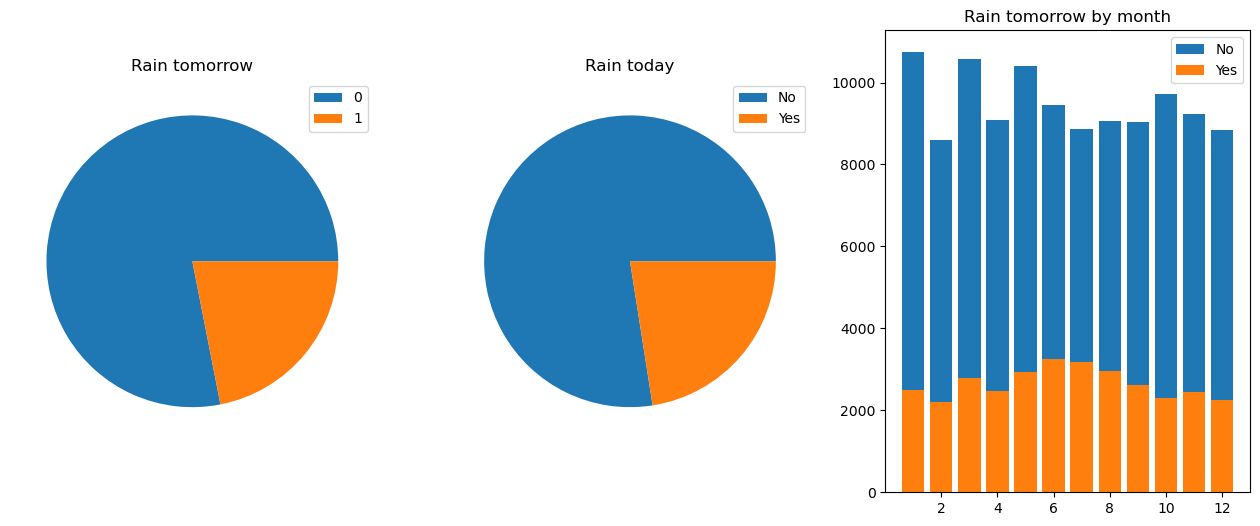

In [21]:
temp_raintomorrow = df.groupby(by=['month', 'raintomorrow']).size()
rain_tomorrow_month = []
for i in temp_raintomorrow.index.levels[0]:
    temp = []
    temp.append(i)
    temp.append(temp_raintomorrow.loc[i][0])
    temp.append(temp_raintomorrow.loc[i][1])
    rain_tomorrow_month.append(temp)
    
df_rain_tomorrow_month = pd.DataFrame(rain_tomorrow_month, columns=['Month', 'No', 'Yes'])

temp_raintomorrow = pd.DataFrame(df.raintomorrow.value_counts())
temp_raintoday = pd.DataFrame(df.raintoday.value_counts())

fig, axs = plt.subplots(1, 3, figsize=(16,6))

axs[0].pie(temp_raintomorrow.raintomorrow)
axs[0].legend(temp_raintomorrow.index)
axs[0].set_title('Rain tomorrow')

axs[1].pie(temp_raintoday.raintoday)
axs[1].legend(temp_raintoday.index)
axs[1].set_title('Rain today')

axs[2].bar(df_rain_tomorrow_month['Month'], df_rain_tomorrow_month['No'])
axs[2].bar(df_rain_tomorrow_month['Month'], df_rain_tomorrow_month['Yes'])
axs[2].legend(temp_raintoday.index)
axs[2].set_title('Rain tomorrow by month')

Text(0.5, 0, 'Month')

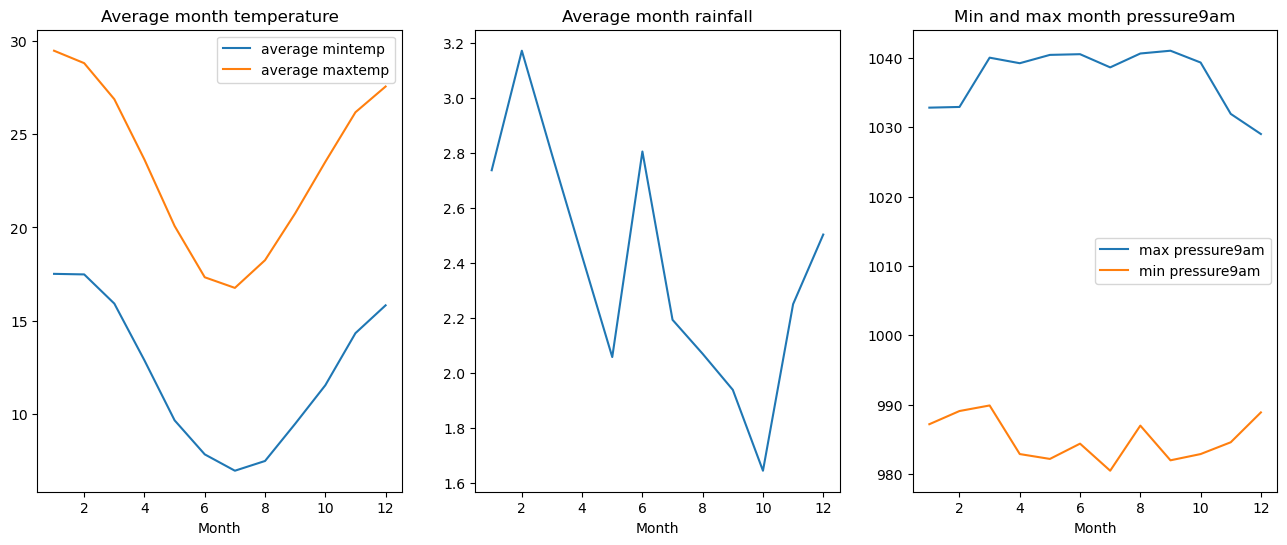

In [22]:
grouped = df.groupby(by=['month'])

fig, axs = plt.subplots(1, 3, figsize=(16,6))

axs[0].plot(grouped['mintemp'].mean())
axs[0].plot(grouped['maxtemp'].mean())
axs[0].legend(['average mintemp', 'average maxtemp'])
axs[0].set_title('Average month temperature')
axs[0].set_xlabel('Month')

axs[1].plot(grouped['rainfall'].mean())
#axs[0].plot(grouped['rainfall'].mean())
#axs[0].legend(['average mintemp', 'average maxtemp'])
axs[1].set_title('Average month rainfall')
axs[1].set_xlabel('Month')

axs[2].plot(grouped['pressure9am'].max())
axs[2].plot(grouped['pressure9am'].min())
axs[2].legend(['max pressure9am', 'min pressure9am'])
axs[2].set_title('Min and max month pressure9am')
axs[2].set_xlabel('Month')

In [24]:
df_full, df_test = train_test_split(df, test_size=0.2, random_state=123)
df_train, df_val = train_test_split(df_full, test_size=0.25, random_state=123)

In [25]:
len(df_train), len(df_val), len(df_test)

(87276, 29092, 29092)

In [26]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [27]:
y_train = df_train['raintomorrow'].values
y_val = df_val['raintomorrow'].values
y_test = df_test['raintomorrow'].values

del df_train['raintomorrow']
del df_val['raintomorrow']
del df_test['raintomorrow']

In [28]:
dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient="records")
X_train = dv.fit_transform(train_dict)
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [29]:
X_train.shape

(87276, 114)

In [30]:
X_val.shape

(29092, 114)

In [31]:
model_01 = LogisticRegression(solver='lbfgs', max_iter=3000)
model_01.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [32]:
y_pred_01 = model_01.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred_01)
print('train:', auc)

y_pred_01 = model_01.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred_01)
print('val:', auc)

train: 0.8550664978721344
val: 0.8523678838901507


In [33]:
min_samples_leaf = [1, 2, 5, 10, 15, 20, 100, 200, 500]
max_depth = np.arange(1, 15, 1)

summary_tree = []

for d in tqdm(max_depth):
    for s in min_samples_leaf:
        model_tree = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        model_tree.fit(X_train, y_train)
        y_pred = model_tree.predict_proba(X_train)[:, 1]
        auc_train = roc_auc_score(y_train, y_pred)

        y_pred = model_tree.predict_proba(X_val)[:, 1]
        auc_val = roc_auc_score(y_val, y_pred)

        summary_tree.append([d, s, auc_train, auc_val])
        
summary_tree = pd.DataFrame(summary_tree, columns=['max_depth', 'min_sample_leaf', 'auc_train', 'auc_val'])

  0%|          | 0/14 [00:00<?, ?it/s]

In [34]:
summary_tree.sort_values(by=['auc_val'], ascending=False).head(10)

,max_depth,min_sample_leaf,auc_train,auc_val
124,14,200,0.861786,0.839530
115,13,200,0.860965,0.839177
106,12,200,0.859971,0.838199
96,11,100,0.865981,0.837925
114,13,100,0.870574,0.837762
105,12,100,0.868696,0.837762
97,11,200,0.858542,0.837750
123,14,100,0.872143,0.837399
88,10,200,0.856427,0.836635
87,10,100,0.862287,0.836616


In [35]:
summary_forest = []

for d in tqdm(range(10, 50, 10)):
    for n in range(10, 191, 30):
        model_forest = RandomForestClassifier(random_state=123, n_estimators=n, max_depth=d)
        model_forest.fit(X_train, y_train)
        forest_predict_train = model_forest.predict_proba(X_train)[:, 1]
        auc_train = roc_auc_score(y_train, forest_predict_train)
        #print('train:', auc_train)

        forest_predict_val = model_forest.predict_proba(X_val)[:, 1]
        auc_val = roc_auc_score(y_val, forest_predict_val)
        #print('val:', auc_val)

        summary_forest.append([d, n, auc_train, auc_val])

summary_forest = pd.DataFrame(summary_forest, columns=['max_depth', 'n_estimators', 'auc_train', 'auc_val'])

  0%|          | 0/4 [00:00<?, ?it/s]

In [36]:
summary_forest[summary_forest['auc_train'] < 0.98].sort_values(by=['auc_val'], ascending=False).head(10)

,max_depth,n_estimators,auc_train,auc_val
6,10,190,0.872260,0.847704
4,10,130,0.872047,0.847566
5,10,160,0.872195,0.847463
3,10,100,0.871709,0.847176
7,20,10,0.977238,0.846843
2,10,70,0.870860,0.846590
1,10,40,0.870167,0.846101
0,10,10,0.863641,0.841508


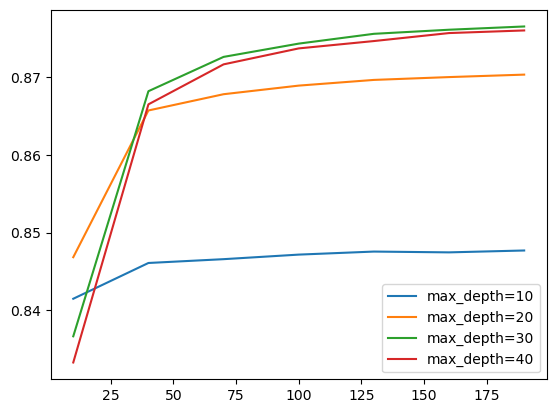

In [37]:
for d in range(10, 50, 10):
    df_subset = summary_forest[summary_forest.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc_val,
             label='max_depth=%d' % d)

plt.legend()

In [38]:
model_02 = DecisionTreeClassifier(max_depth=12, min_samples_leaf=200)
model_02.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=12, min_samples_leaf=200)

In [39]:
y_pred_02 = model_02.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred_02)
print('train:', auc)

y_pred_02 = model_02.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred_02)
print('val:', auc)

train: 0.8599713317681856
val: 0.8382357188598086


In [40]:
model_03 = RandomForestClassifier(random_state=123, n_estimators=190, max_depth=10)
model_03.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=190, random_state=123)

In [41]:
y_pred_03 = model_03.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred_03)
print('train:', auc)

y_pred_03 = model_03.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred_03)
print('val:', auc)

train: 0.8722600620318441
val: 0.8477039038896302


In [42]:
df_full = df_full.reset_index(drop=True)
y_full = df_full['raintomorrow'].values

del df_full['raintomorrow']

In [43]:
dv = DictVectorizer(sparse=False)
full_dict = df_full.to_dict(orient="records")
X_full = dv.fit_transform(full_dict)
test_dicts = df_test.to_dict(orient='records')
X_test = dv.transform(test_dicts)

In [44]:
model_final = RandomForestClassifier(random_state=123, n_estimators=190, max_depth=10)
model_final.fit(X_full, y_full)

RandomForestClassifier(max_depth=10, n_estimators=190, random_state=123)

In [45]:
y_pred_final = model_final.predict_proba(X_full)[:, 1]
auc = roc_auc_score(y_full, y_pred_final)
print('train:', auc)

y_pred_final = model_final.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_final)
print('val:', auc)

train: 0.8670470213424031
val: 0.8503816129405799


In [46]:
def train(df_train, y_train):
    dv = DictVectorizer(sparse=False)
    df_dict_train = df_train.to_dict(orient="records")
    X_train = dv.fit_transform(df_dict_train)
    
    model = RandomForestClassifier(random_state=123, n_estimators=190, max_depth=10)
    model.fit(X_train, y_train)
    
    return dv, model

In [47]:
dv, model = train(df_train, y_train)

In [48]:
def predict(df, dv, model):
    
    df_dict = df.to_dict(orient="records")

    X = dv.transform(df_dict)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [49]:
y_pred = predict(df_val, dv, model)

In [50]:
dv, model = train(df_full, y_full)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

0.8503816129405799

In [51]:
import pickle

In [52]:
output_file = 'model_forest.bin'

In [53]:
f_out = open(output_file, 'wb')
pickle.dump((dv, model), f_out)
f_out.close()